In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [291]:
canvas_w = 800
canvas_h = 600
critical_points = [(0, 0), (0, canvas_h), (canvas_w, canvas_h), (canvas_w, 0)]
critical_x = [p[0] for p in critical_points] + [critical_points[0][0]]
critical_y = [p[1] for p in critical_points] + [critical_points[0][1]]

rect_sides = [1,2,3,4] # for 1st and 3rd sides x is the same, y changes; for 2nd and 4th sides y is the same, x changes.
random_pair = np.random.choice(rect_sides, 2)
# print(random_pair)

def random_point_by_rect_side(side_number: int, canvas_w: int, canvas_h: int):
    '''1 side is left side, 2 is the horizontal top, 3rd is vertical right side, 4th is horizontal bottom'''
    preset = {
        1: (0, np.random.randint(0, canvas_h)),
        2: (np.random.randint(0, canvas_w), canvas_h),
        3: (canvas_w, np.random.randint(0, canvas_h)),
        4: (np.random.randint(0, canvas_w), 0)
    }

    return preset[side_number]

# print(random_point_by_rect_side(4, canvas_w, canvas_h))

def select_2_random_points_on_rectangle(canvas_w: int, canvas_h: int) -> list[tuple]:
    side_idx = [1,2,3,4]
    random_side_pair = np.random.choice(side_idx, size = 2, replace=False)
    if random_side_pair[1] == random_side_pair[0]:
        raise ValueError(f'Sides should not be the same: {random_side_pair}')
    
    point_a = random_point_by_rect_side(random_side_pair[0], canvas_w, canvas_h)
    point_b = random_point_by_rect_side(random_side_pair[1], canvas_w, canvas_h)

    return [point_a, point_b]

print(select_2_random_points_on_rectangle(canvas_w, canvas_h))

def get_line_coefs_given_two_points(two_points: list[tuple]):
    '''We are given two points (x,y) & (x2, y2). We need to identify the line equation for them: y = ax + b'''
    point_a = two_points[0]
    point_b = two_points[1]

    a_coef = (point_b[1] - point_a[1]) / (point_b[0] - point_a[0])
    b_coef = point_a[1] - a_coef * point_a[0]


    check_val_1 = a_coef*point_a[0] + b_coef - point_a[1]
    check_val_2 = a_coef*point_b[0] + b_coef - point_b[1]
    if np.abs(check_val_1) > 0.0001 or np.abs(check_val_2) > 0.0001:
        raise ValueError(f'Some error. Check1: {check_val_1}. Check2: {check_val_2}')
    
    return (a_coef, b_coef)

two_points = select_2_random_points_on_rectangle(canvas_w, canvas_h)
print(get_line_coefs_given_two_points(two_points))

[(0, 381), (635, 600)]
(-0.21858638743455497, 607.869109947644)


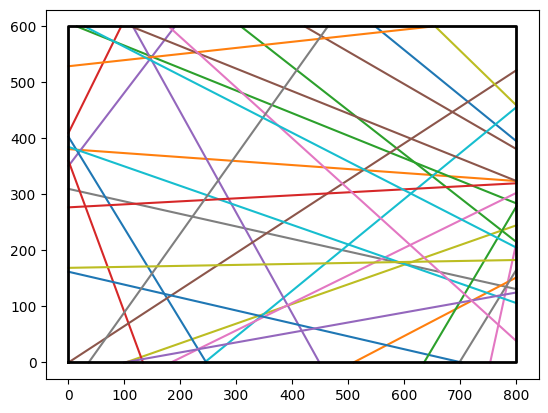

In [338]:


for _ in range(30):
    points = select_2_random_points_on_rectangle(canvas_w, canvas_h)
    plt.plot([p[0] for p in points], [p[1] for p in points])

plt.plot(critical_x, critical_y, color='k', linewidth=2)
plt.gca().set_aspect('equal')
plt.show()